In [28]:
'''
Keras标准工作流程：compile()、fit()、evaluate()、predict()
'''

'\nKeras标准工作流程：compile()、fit()、evaluate()、predict()\n'

In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
 #使用函数式Api创建模型（我们将其包装为一个单独的函数，以便后续复用）
def get_mnist_model(): 
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    #Dropout正则化，在训练过程中随机舍弃该层的一些输出特征（将其设为0），提高模型的泛化能力
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

In [31]:
#加载数据，保留一部分数据用于验证
(images, labels), (test_images, test_labels) = mnist.load_data()  
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [32]:
#实例化模型
model = get_mnist_model()
 #编译模型，指定模型的优化器、需要最小化的损失函数和需要监控的指标
model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#summary()方法显示模型内容,对调试模型很有帮助
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [33]:
#通过fit()的callbacks参数将回调函数传入模型中，该参数接收一个回调函数列表
callbacks_list =[
    #val_accuracy：监控模型精度；如果精度在两轮内都不在改善，则中断训练
    keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2),
    #TensorBoard:在训练过程中以可视化方式监控指标；将模型架构可视化；将激活函数和梯度的直方图可视化
    #然后访问命令执行返回的URL：tensorboard --logdir ./tensorboard_log
    keras.callbacks.TensorBoard(log_dir="/Users/xun/data/tensorboard_log")
]
# 使用fit()训练模型，可以选择提供验证数据来监控模型在前所未见的数据上的性能
history=model.fit(train_images, train_labels,  
          epochs=20,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/20
   1/1563 [..............................] - ETA: 0s - loss: 2.3527 - accuracy: 0.0938WARNING:tensorflow:From /Users/xun/app/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2942 - accuracy: 0.9135 - val_loss: 0.1483 - val_accuracy: 0.9581
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1629 - accuracy: 0.9544 - val_loss: 0.1178 - val_accuracy: 0.9683
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1385 - accuracy: 0.9622 - val_loss: 0.1198 - val_accuracy: 0.9683
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1246 - accuracy: 0.9691 - val_loss: 0.1140 - val_accuracy: 0.9721
Epoch 5/20
1563/1563 [=====================

In [34]:
#保存模型、加载模型
# model.save('my_checkpoint_path')
#model = keras.models.load_model("checkpoint_path.keras")

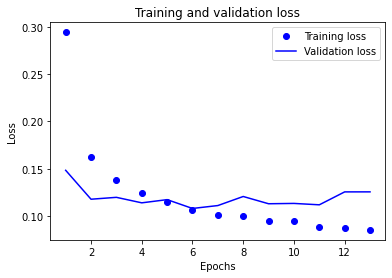

In [35]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")  # "bo"表示“蓝色圆点”
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  # "b"表示“蓝色实线”
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

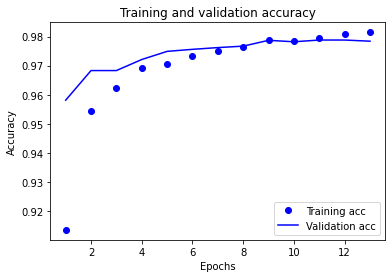

In [36]:
plt.clf()  #清空图像
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
#使用evaluate()计算模型在新数据上的损失和指标
test_metrics = model.evaluate(test_images, test_labels)  

313/313 [==============================] - 1s 3ms/step - loss: 0.1117 - accuracy: 0.9802


In [38]:
 #使用predict()计算模型在新数据上的分类概率
predictions = model.predict(test_images) 
print(predictions[0].argmax(),test_labels[0])

7 7
